In [245]:
%run Car.ipynb

MODELING SECOND RULE OF COMFORT

In [246]:
#initialize the car instances
car = Car(id = 1, position = 10.0, sec_rule = None, velocity1 = 60.0, velocity2 = 20.0, delta_t = 1.0, acc1 = 0.0, d_min = 0.001, max_speed = 45.0, front_car = None, a_min = -2.0, a_max = 3.0, a_emer = 5.0)


Scenario1: Driving Uphill

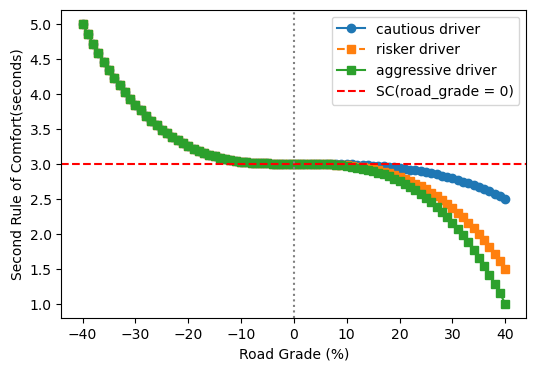

In [247]:
y_uphills = [2.5, 1.5, 1.0]
y_downhill = 5.0
t = 3.0

road_grades = np.arange(-40, 41, 1)

# Use a dictionary to store results for each y_uphill
s_c_results = {}

for y_uphill in y_uphills:
    s_c_values = [
        car.compute_second_rule_comfort_cubic_final(rg, y_uphill, y_downhill, t, 40.0, -40.0)
        for rg in road_grades
    ]
    
    s_c_results[y_uphill] = s_c_values

s_c_values1, s_c_values2, s_c_values3 = [s_c_results[y] for y in y_uphills]
car.plot_sc(road_grades, s_c_values1, s_c_values2, s_c_values3)

Scenario2: Driving Downhill

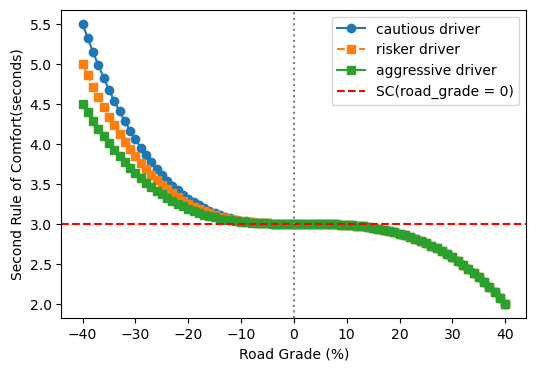

In [248]:
y_downhills = [5.5, 5.0, 4.5]
y_uphill = 2.0
t = 3.0

road_grades = np.arange(-40, 41, 1)

# Use a dictionary to store results for each y_downhill
s_c_results = {}

for y_downhill in y_downhills:
    s_c_values = [
        car.compute_second_rule_comfort_cubic_final(rg, y_uphill, y_downhill, t, 40.0, -40.0)
        for rg in road_grades
    ] 
    s_c_results[y_downhill] = s_c_values

s_c_values1, s_c_values2, s_c_values3 = [s_c_results[y] for y in y_downhills]
car.plot_sc(road_grades, s_c_values1, s_c_values2, s_c_values3)

Scenario3: Driving on Non-Sloped Road

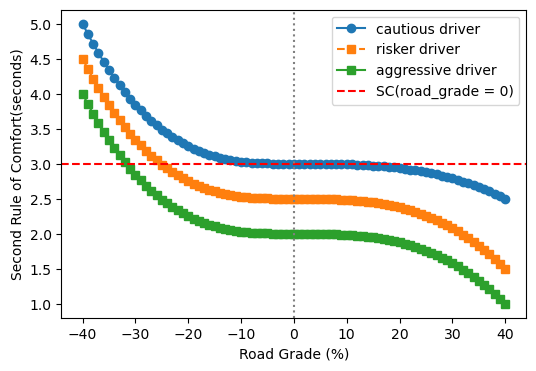

In [249]:
y_uphills = [2.5, 1.5, 1.0]
y_downhills = [5.0, 4.5, 4.0]
sc_flats = [3.0, 2.5, 2.0]

# Use a dictionary to store results for each sc_flat
s_c_results = {}

for i in range(len(sc_flats)):
    s_c_values = [
        car.compute_second_rule_comfort_cubic_final(rg, y_uphills[i], y_downhills[i], sc_flats[i], 40.0, -40.0)
        for rg in road_grades
    ]
    s_c_results[sc_flats[i]] = s_c_values


s_c_values1, s_c_values2, s_c_values3 = [s_c_results[t] for t in sc_flats]
car.plot_sc(road_grades, s_c_values1, s_c_values2, s_c_values3)


MODELING CHANGE OF SECOND RULE OF COMFORT ON CHANGING ROAD GRADE

In [250]:
car1 = Car(id = 1, position = 10.0, sec_rule = None, velocity1 = 60.0, velocity2 = 20.0, delta_t = 1.0, acc1 = 0.0, d_min = 0.001, max_speed = 45.0, front_car = None, a_min = -2.0, a_max = 3.0, a_emer = 5.0)
car2 = Car(id = 2, position = 2.0, sec_rule = None, velocity1 = 60.0, velocity2 = 20.0, delta_t = 1.0, acc1 = 0.0, d_min = 0.001, max_speed = 45.0, front_car = car1, a_min = -2.0, a_max = 3.0, a_emer = 5.0)


In [251]:
# Initialize previous value for computing change
previous_s_c1 = None
previous_s_c2 = None

#car1 [y_uphill, y_downhill, t]
car1_sc = [2.0, 5.0, 3.0]
car2_sc = [1.0, 3.0, 2.0]

# Print table header
print(f"{'road_grade':>12} | {'sec_comfort_car1_cautious':>26} | {'change':>10} | {'sec_comfort_car2_aggressive':>26}  | {'change':>10}")
print("-" * 100)

# Iterate correctly through road grades from -40% to 40%
for rg in range(-40, 41):  
    second_rule_comfort1 = car1.compute_second_rule_comfort_cubic_final(rg,car1_sc[0],car1_sc[1], car1_sc[2])
    second_rule_comfort2 = car2.compute_second_rule_comfort_cubic_final(rg,car2_sc[0],car2_sc[1], car2_sc[2])

    # Compute the change in `s_c` from the previous row
    change_in_s_c1 = second_rule_comfort1 - previous_s_c1  if previous_s_c1  is not None else None
    change_in_s_c2 = second_rule_comfort2 - previous_s_c2  if previous_s_c2  is not None else None
    
     # Compute the change in `s_c` from the previous row
    change_in_s_c1 = second_rule_comfort1 - previous_s_c1 if previous_s_c1 is not None else None
    change_in_s_c2 = second_rule_comfort2 - previous_s_c2 if previous_s_c2 is not None else None

    # Print the table with proper formatting
    print(f"{rg:>12} | {second_rule_comfort1:>26.10f} | {round(change_in_s_c1,10) if change_in_s_c1 is not None else '-':>10} | {second_rule_comfort2:>26.10f} | {round(change_in_s_c2,10) if change_in_s_c2 is not None else '-':>10}")

    # Update previous_s_c for the next iteration
    previous_s_c1 = second_rule_comfort1
    previous_s_c2 = second_rule_comfort2


  road_grade |  sec_comfort_car1_cautious |     change | sec_comfort_car2_aggressive  |     change
----------------------------------------------------------------------------------------------------
         -40 |               5.0000000000 |          - |               3.0000000000 |          -
         -39 |               4.8537187500 | -0.14628125 |               2.9268593750 | -0.073140625
         -38 |               4.7147500000 | -0.13896875 |               2.8573750000 | -0.069484375
         -37 |               4.5829062500 | -0.13184375 |               2.7914531250 | -0.065921875
         -36 |               4.4580000000 | -0.12490625 |               2.7290000000 | -0.062453125
         -35 |               4.3398437500 | -0.11815625 |               2.6699218750 | -0.059078125
         -34 |               4.2282500000 | -0.11159375 |               2.6141250000 | -0.055796875
         -33 |               4.1230312500 | -0.10521875 |               2.5615156250 | -0.052609375
   

MODELING CHANGE OF ACCELERATION ON CHANGING SECOND RULE OF COMFORT

In [252]:
sec_rules_vec = np.linspace(0,5, 10000)
car3 = Car(id = 3, position = 10.0, sec_rule=sec_rules_vec, velocity1 = 60.0, velocity2 = 20.0, delta_t = 1/3600, acc1 = 0.0, d_min = 0.001, max_speed = 45.0, front_car = None, a_min = -2.0, a_max = 3.0, a_emer = -5.0)
car4 = Car(id = 4, position = 10.0, sec_rule=sec_rules_vec, velocity1 = 60.0, velocity2 = 20.0, delta_t = 1/3600, acc1 = 0.0, d_min = 0.001, max_speed = 45.0, front_car = None, a_min = -2.0, a_max = 3.0, a_emer = -5.0)
car5 = Car(id = 5, position = 10.0, sec_rule=sec_rules_vec, velocity1 = 60.0, velocity2 = 20.0, delta_t = 1/3600, acc1 = 0.0, d_min = 0.001, max_speed = 45.0, front_car = None, a_min = -2.0, a_max = 3.0, a_emer = -5.0)

uphill_grade = 20.0
downhill_grade = -20.0
y_uphills = [2.5, 1.5, 1.0]
y_downhills = [5.0, 4.5, 4.0]
sc_flats = [3.0, 2.5, 2.0]

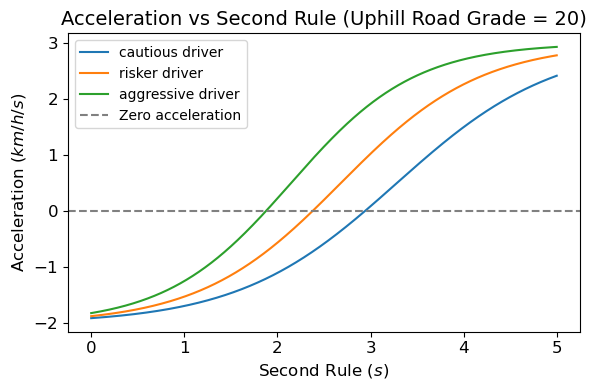

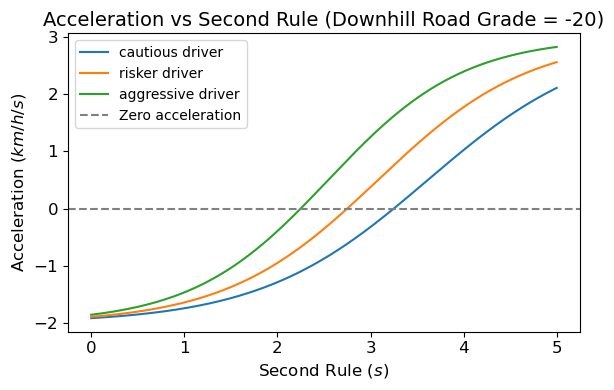

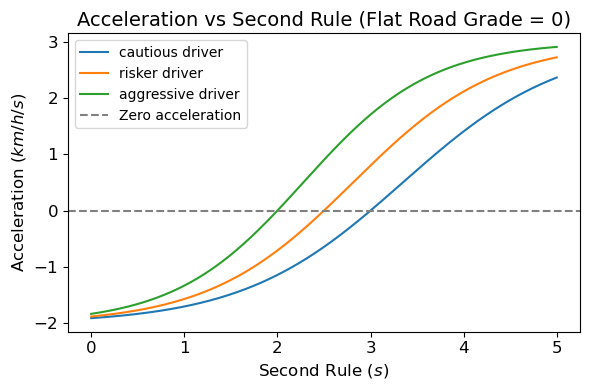

In [253]:
labels = ["cautious driver", "risker driver", "aggressive driver"]

# --- UPHILL ---
accs_uphill = [
    car3.compute_acceleration_update(uphill_grade, y_uphills[0], y_downhills[0], sc_flats[0]),
    car4.compute_acceleration_update(uphill_grade, y_uphills[1], y_downhills[1], sc_flats[1]),
    car5.compute_acceleration_update(uphill_grade, y_uphills[2], y_downhills[2], sc_flats[2]),
]

sec_uphill_cleaned = []
acc_uphill_cleaned = []

for acc in accs_uphill:
    sec, acc_clean = clean_acceleration_data(acc, sec_rules_vec)
    sec_uphill_cleaned.append(sec)
    acc_uphill_cleaned.append(acc_clean)

car3.plot_acceleration_by_driver(sec_uphill_cleaned, acc_uphill_cleaned, labels, "Acceleration vs Second Rule (Uphill Road Grade = 20)")


# --- DOWNHILL ---
accs_downhill = [
    car3.compute_acceleration_update(downhill_grade, y_uphills[0], y_downhills[0], sc_flats[0]),
    car4.compute_acceleration_update(downhill_grade, y_uphills[1], y_downhills[1], sc_flats[1]),
    car5.compute_acceleration_update(downhill_grade, y_uphills[2], y_downhills[2], sc_flats[2]),
]

sec_downhill_cleaned = []
acc_downhill_cleaned = []

for acc in accs_downhill:
    sec, acc_clean = clean_acceleration_data(acc, sec_rules_vec)
    sec_downhill_cleaned.append(sec)
    acc_downhill_cleaned.append(acc_clean)

car3.plot_acceleration_by_driver(sec_downhill_cleaned, acc_downhill_cleaned, labels, "Acceleration vs Second Rule (Downhill Road Grade = -20)")


# --- FLAT ---
accs_flat = [
    car3.compute_acceleration_update(0, y_uphills[0], y_downhills[0], sc_flats[0]),
    car4.compute_acceleration_update(0, y_uphills[1], y_downhills[1], sc_flats[1]),
    car5.compute_acceleration_update(0, y_uphills[2], y_downhills[2], sc_flats[2]),
]

sec_flat_cleaned = []
acc_flat_cleaned = []

for acc in accs_flat:
    sec, acc_clean = clean_acceleration_data(acc, sec_rules_vec)
    sec_flat_cleaned.append(sec)
    acc_flat_cleaned.append(acc_clean)

car3.plot_acceleration_by_driver(sec_flat_cleaned, acc_flat_cleaned, labels, "Acceleration vs Second Rule (Flat Road Grade = 0)")
